In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
data=pd.read_csv('C:/Users/soura/Desktop/Datasets/campus-placement/placement.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [50]:
placed=pd.DataFrame(data[data['status']=='Placed'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**What factors lead to a student getting placed??**

In [6]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Out of 215 students 148 students got placed

In [7]:
data['salary']=data['salary'].fillna(0.0)

Is there any relationship between mba percent and aptitude test percent?

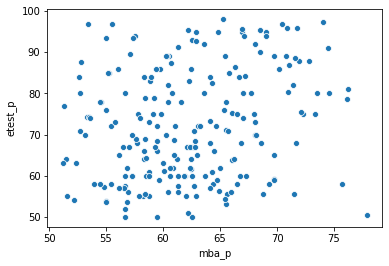

In [8]:
sns.scatterplot(x=data['mba_p'],y=data['etest_p'])

All over the place

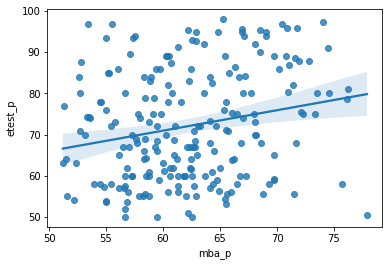

In [9]:
sns.regplot(x=data['mba_p'],y=data['etest_p'])

### Very slight correlation between mba % and Etest%(Not reliable)

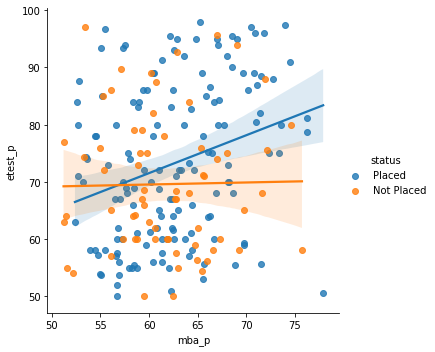

In [10]:
sns.lmplot(x='mba_p',y='etest_p',hue='status',data=data)

#### Lets see the correlation between those being placed and both metrics individually

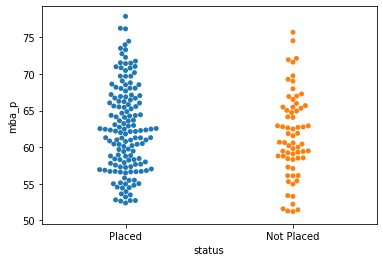

In [11]:
sns.swarmplot(x=data['status'],y=data['mba_p'])

#### Seems to be no correlation

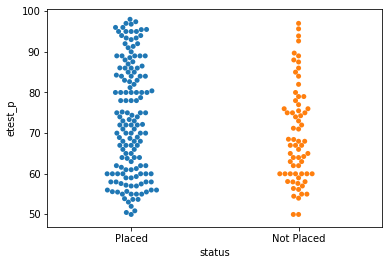

In [12]:
sns.swarmplot(x=data['status'],y=data['etest_p'])

No correlation between grades and placement status at all

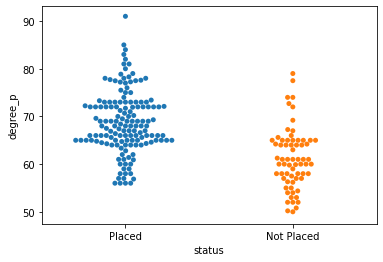

In [13]:
sns.swarmplot(x=data['status'],y=data['degree_p'])

### Placed students tend to have better degree percentage

In [14]:
m_data=placed[placed['gender']=='M']
f_data=placed[placed['gender']=='F']

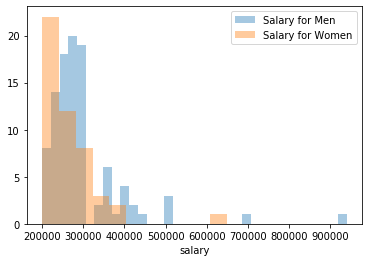

In [15]:
sns.distplot(a=m_data['salary'],kde=False,label='Salary for Men')
sns.distplot(a=f_data['salary'],kde=False,label='Salary for Women')

plt.legend()

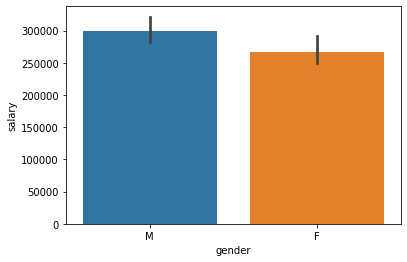

In [16]:
sns.barplot(y=m_data['salary'],x=data['gender'])
sns.barplot(y=f_data['salary'],x=data['gender'])

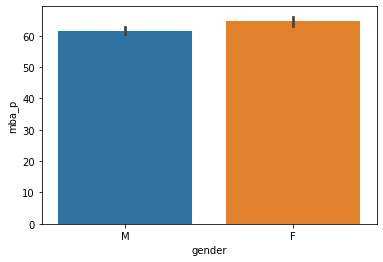

In [17]:
sns.barplot(x=placed['gender'],y=placed['mba_p'])

#### Men tend get higher packages as compared to women eventhough women tend to have better mba percentage

In [18]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


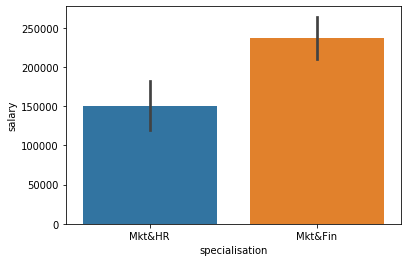

In [19]:
sns.barplot(x=data['specialisation'],y=data['salary'])

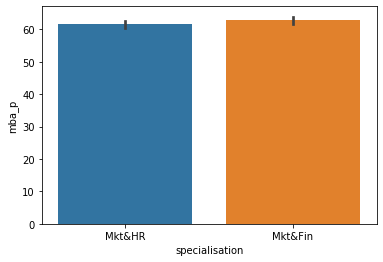

In [20]:
sns.barplot(x=data['specialisation'],y=data['mba_p'])

##### Finance students tend to get higher packages even though they on average score same as HR students

In [21]:
ndata=placed.groupby(['gender','specialisation'])[['salary']].mean().reset_index()

In [22]:
ndata

,gender,specialisation,salary
0,F,Mkt&Fin,279285.714286
1,F,Mkt&HR,250500.000000
2,M,Mkt&Fin,307029.850746
3,M,Mkt&HR,282424.242424


In [23]:
ndata['ss']=['female finance','female HR','male finance','male HR']

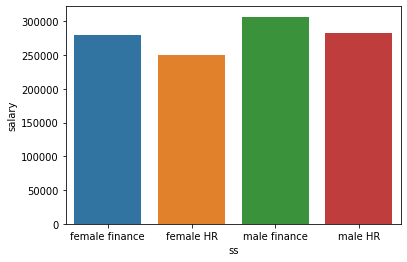

In [24]:
sns.barplot(x=ndata['ss'],y=ndata['salary'])

Male finance students get the best packages and Female HR students tend to get worst packages

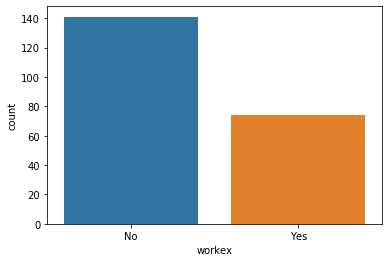

In [25]:
sns.countplot(x='workex',data=data)

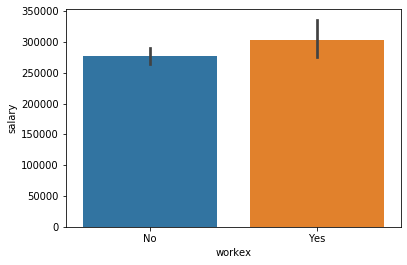

In [26]:
sns.barplot(x=placed['workex'],y=placed['salary'])

#### Students with work experience get higher packages

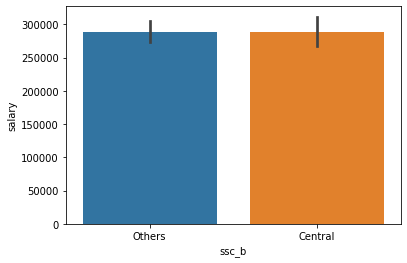

In [27]:
sns.barplot(x=placed['ssc_b'],y=placed['salary'])

#### Average Package for both is same

In [28]:
ismale=(data['gender']=='M')

In [29]:
isfemale=(data['gender']=='F')

In [30]:
isplaced=(data['status']=='Placed')

In [31]:
ismale.value_counts()#There are 139 boys and 76 girls

True     139
False     76
Name: gender, dtype: int64

In [32]:
isplaced.value_counts()#148 students are placed and 67 arent

True     148
False     67
Name: status, dtype: int64

In [33]:
(ismale & isplaced).value_counts()#Out of 148 boys 100 got placed

False    115
True     100
dtype: int64

In [34]:
100/148 # Probability of a boy getting placed is 0.675

0.6756756756756757

In [35]:
(isfemale&isplaced).value_counts()#Out of 76 girls 48 got placed

False    167
True      48
dtype: int64

In [36]:
48/76 #Probability of a girl geting placed is 0.63
#Therefore boys have a higher chance of getting placed

0.631578947368421

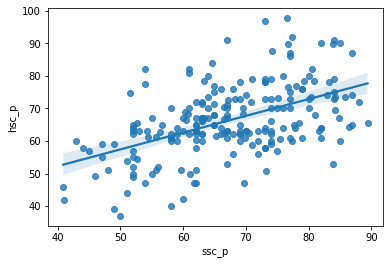

In [37]:
sns.regplot(x=data['ssc_p'],y=data['hsc_p'])

#### Students with high marks in 10th tend get high marks in 12th

In [38]:
placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


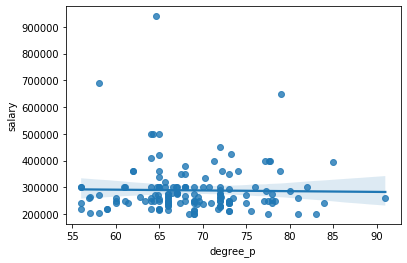

In [39]:
sns.regplot(x=placed['degree_p'],y=placed['salary'])

#### No correlation between degree marks and salary

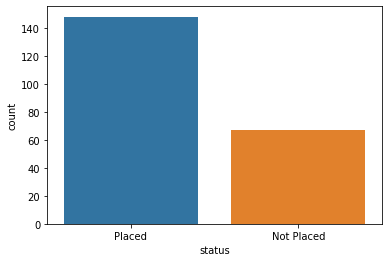

In [40]:
sns.countplot(x='status',data=data)

In [45]:
values = [(data['ssc_p'].mean()),(data['hsc_p'].mean()),(data['mba_p'].mean()),(data['degree_p'].mean()),(data['etest_p'].mean())]
names=['ssc_p','hsc_p','mba_p','degree_p','etest_p']

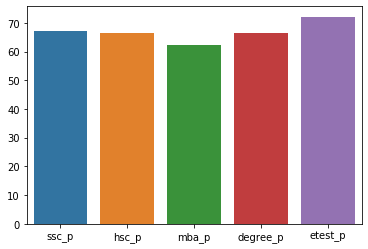

In [46]:
sns.barplot(x=names,y=values)

In [47]:
data['workex'].replace(to_replace='Yes',value=1,inplace=True)
data['workex'].replace(to_replace='No',value=0,inplace=True)